# **Exp- 1**

## **Bank Churn ANN**

# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd

# **Loading the Churn Dataset**

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

**Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.**

In [2]:
churn_data = pd.read_csv('/workspace/COde Ml/Deep learning/bank.csv', delimiter = ',')
churn_data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [3]:
churn_data.sample(10) # .sample(10): Randomly selects 10 rows from the dataset.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4895,4896,15589435,Davide,784,France,Male,31,7,0.00,2,1,1,143204.41,0
8092,8093,15663770,Doyle,802,France,Male,38,1,142557.11,1,1,1,172497.73,0
9937,9938,15782475,Edith,700,France,Female,42,8,0.00,2,1,1,105305.72,0
7673,7674,15788634,Romani,750,Spain,Female,37,2,113817.06,1,0,0,88333.74,0
3403,3404,15611800,Loggia,624,France,Female,62,7,125163.62,2,1,1,151411.50,0
5148,5149,15812767,Harvey,731,Spain,Male,70,3,0.00,2,1,1,141180.66,0
946,947,15745324,Milani,599,Spain,Female,39,4,0.00,1,1,0,194273.20,1
756,757,15637979,Fuller,664,Germany,Female,36,2,127160.78,2,1,0,78140.75,0
4245,4246,15569446,Tu,732,France,Female,34,8,122338.43,2,1,0,187985.85,0
3413,3414,15627412,Ferri,605,France,Male,39,3,0.00,2,1,0,199390.45,0


# **Accessing the Column Names in the Dataset**

In [4]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
churn_data.shape


(10000, 14)

# **Setting Column as a Index**

In [6]:
churn_data = churn_data.set_index('RowNumber')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Finding the Shape of the Dataset**

In [8]:
churn_data.shape

(10000, 13)

In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


# **Checking Missing Values**

In [10]:
churn_data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Some Columns are Totally Unproductive so let's Remove them**

In [11]:
churn_data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [13]:
churn_data.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [14]:
churn_data.shape

(10000, 11)

# **Label Encoding of Categorical Variables**
Label Encoding is a preprocessing technique used to convert categorical variables into numerical values. This transformation is essential because most machine learning algorithms require numerical input data to perform computations effectively.

# ***Example:***
Consider a dataset with a categorical feature named Height, which contains the values: Tall, Medium, and Short. To make this feature compatible with machine learning models, we apply label encoding. After encoding, the categorical values are mapped to integers as follows:

# ***Tall → 0***

# ***Medium → 1***

# ***Short → 2***

This transformation replaces the original categorical values with their corresponding numerical labels, enabling the feature to be used in machine learning workflows.

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_data[['Geography', 'Gender']] = churn_data[['Geography', 'Gender']].apply(le.fit_transform)

In [16]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# **Seperating Label from Data**
In a supervised learning problem, the dataset consists of features (input variables) and labels (target variable). Before training a model, we need to separate the labels from the rest of the data.

# **This step ensures that:**
✅ The model learns only from input features.

✅ Labels are stored separately for supervised learning.

✅ Data preprocessing and transformations are applied only to features, avoiding data leakage.

In [17]:
y = churn_data.Exited
X = churn_data.drop(['Exited'],axis=1)

In [18]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [19]:
y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

# **🔀 Splitting the Data into Training and Testing**
Before training a machine learning model, it is essential to split the dataset into training and testing sets. This ensures that the model learns patterns from one portion of the data and is evaluated on unseen data, helping to assess its generalization ability.

# **Why Split the Data?**
✅ Prevents Overfitting – Ensures the model doesn’t just memorize the data but learns patterns.

✅ Evaluates Performance – Helps measure accuracy, precision, recall, and other metrics on unseen data.

✅ Improves Model Generalization – Ensures the model performs well on real-world data.

Common Splitting Ratios
80% Training / 20% Testing (Standard practice)
70% Training / 30% Testing (For larger datasets)
60% Training / 20% Validation / 20% Testing (When hyperparameter tuning is needed)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [21]:
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (7000, 10)
Shape of the X_test (3000, 10)
Shape of the y_train (7000,)
Shape of the y_test (3000,)


# 🚀 Feature Scaling: Standardization vs. Min-Max Scaling  

Feature scaling is a crucial step in data preprocessing that transforms numerical features into a standardized format to improve the performance of machine learning models. Two widely used methods for scaling data are **Z-Score Standardization** and **Min-Max Scaling**.

## 📌 **Z-Score Standardization (Standardization)**  
Z-Score standardization rescales data so that it has the properties of a standard normal distribution, where:  
- **Mean (𝜇) = 0**  
- **Standard deviation (𝜎) = 1**  

The standardization formula is:  
\[
z = \frac{x - \mu}{\sigma}
\]  
where:  
- \( x \) is the original feature value  
- \( \mu \) is the mean of the feature  
- \( \sigma \) is the standard deviation  

✅ **When to Use?**  
- When data has different scales but follows a **Gaussian (normal) distribution**  
- When using **distance-based algorithms** (e.g., SVM, k-NN, PCA)  

---

## 📌 **Min-Max Scaling (Normalization)**  
Min-Max scaling (also known as **Normalization**) transforms data into a fixed range, typically **[0, 1]**. This ensures that all feature values are proportionally scaled.  

The formula for Min-Max scaling is:  
\[
X_{\text{norm}} = \frac{X_i - X_{\min}}{X_{\max} - X_{\min}}
\]  
where:  
- \( X_i \) is the original feature value  
- \( X_{\min} \) and \( X_{\max} \) are the minimum and maximum values of the feature  

✅ **When to Use?**  
- When data does **not follow a normal distribution**  
- When **preserving relationships** between feature values is important  
- Common in **image processing** (e.g., RGB pixel intensities scaled to [0, 255])  
- Often required for **Neural Networks**, where data is typically scaled between **-1 and 1**  

---

## ⚖️ **Z-Score Standardization vs. Min-Max Scaling**  

| Feature | Z-Score Standardization | Min-Max Scaling |
|---------|------------------------|-----------------|
| **Output Range** | Mean = 0, Std = 1 | Typically [0, 1] |
| **Handles Outliers?** | ✅ Less affected | ❌ Sensitive to outliers |
| **Best for** | Normally distributed data | Image processing, neural networks |
| **Used in** | SVM, PCA, k-NN | CNNs, RGB data, constrained ranges |

💡 **Key Takeaway:** There is no absolute rule for choosing between the two. It depends on the dataset and the machine learning algorithm used.

### **Why Normalization is Important?**  

When working with datasets that contain features with vastly different scales, **normalization** is crucial to ensure fair and balanced analysis.  

Consider a dataset with two features:  
- **Age (\(x_1\))**: Ranges from **0 to 100**  
- **Income (\(x_2\))**: Ranges from **20,000 to 500,000**  

Since **income values are significantly larger** than age, any machine learning model (e.g., **multivariate linear regression**) will inherently assign **more weight** to income, simply because of its larger magnitude. This can lead to biased predictions, even though age might be equally or more important as a predictor.  

### **Benefits of Normalization:**  
✅ **Prevents one feature from dominating** the model due to scale differences  
✅ **Speeds up gradient descent** in optimization algorithms  
✅ **Improves model performance** by ensuring equal contribution from all features  
✅ **Enhances numerical stability**, reducing computation errors  

By applying **normalization** (e.g., **Min-Max Scaling** or **Z-score Standardization**), we bring all features to a **similar scale**, leading to **better, more reliable models**. 🚀

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Building the ANN Model**

In [23]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

2025-02-04 09:39:22.431419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-04 09:39:22.431734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-04 09:39:22.464085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 09:39:22.548645: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

2025-02-04 09:39:25.335430: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1926] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17947 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 3g.20gb, pci bus id: 0000:b7:00.0, compute capability: 8.0


### **Neural Network Model Description**  

This code defines a **Sequential Neural Network** using **Keras** for binary classification. The model consists of **one input layer, two hidden layers, and one output layer**.  

#### **📌 Layers Breakdown**  

1️⃣ **Input & First Hidden Layer**  
   ```python
   classifier.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=10))
   ```
   - **`input_dim=10`**: The input layer expects **10 features**.  
   - **`units=8`**: First hidden layer contains **8 neurons**.  
   - **`activation='relu'`**: Uses **ReLU (Rectified Linear Unit)** activation for non-linearity.  
   - **`kernel_initializer='uniform'`**: Weights are initialized uniformly.  

2️⃣ **Second Hidden Layer**  
   ```python
   classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
   ```
   - **`units=16`**: Second hidden layer has **16 neurons**.  
   - **ReLU activation** continues to introduce non-linearity.  

3️⃣ **Output Layer**  
   ```python
   classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
   ```
   - **`units=1`**: The output layer has **1 neuron** for **binary classification**.  
   - **`activation='sigmoid'`**: The **sigmoid** function outputs probabilities between **0 and 1**.  

#### **💡 Key Takeaways**  
✅ Uses **ReLU activation** in hidden layers for better gradient propagation.  
✅ **Sigmoid activation** in the output layer for binary classification.  
✅ **Uniform weight initialization** ensures a stable start to training.  

This model is suitable for **binary classification problems**, such as predicting customer churn, fraud detection, or medical diagnoses. 🚀  

# **Compiling and Fitting the Model**


### **Artificial Neural Network (ANN) Model Training – Churn Prediction**  

In this step, we **compile and train an Artificial Neural Network (ANN)** to predict customer churn.  

- **Optimizer:** `'adam'` → Adaptive Moment Estimation for efficient weight updates.  
- **Loss Function:** `'binary_crossentropy'` → Suitable for binary classification tasks like churn prediction.  
- **Metrics:** `['accuracy']` → Evaluates how well the model predicts churn.  

#### **🔹 Model Training**  
- **Training Data:** `X_train` (features), `y_train` (labels).  
- **Batch Size:** `10` → The model updates weights after every 10 samples.  
- **Epochs:** `100` → The dataset is passed through the network 100 times.  
- **Verbose:** `1` → Displays real-time training progress.  

The model learns patterns in the data and adjusts weights to minimize loss, improving its ability to predict customer churn. 🚀  

In [25]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 1)

Epoch 1/100


2025-02-04 09:39:27.217123: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0cd31d4c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-02-04 09:39:27.217177: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB MIG 3g.20gb, Compute Capability 8.0
2025-02-04 09:39:27.229188: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-04 09:39:27.298202: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:467] Loaded cuDNN version 90100
I0000 00:00:1738661967.398600    1314 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


700/700 [==============================] - 3s 2ms/step - loss: 0.4751 - accuracy: 0.7924
Epoch 2/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4322 - accuracy: 0.7926
Epoch 3/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8066
Epoch 4/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4185 - accuracy: 0.8264
Epoch 5/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8300
Epoch 6/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4095 - accuracy: 0.8314
Epoch 7/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4063 - accuracy: 0.8327
Epoch 8/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4031 - accuracy: 0.8319
Epoch 9/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8331
Epoch 10/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4014 - accuracy: 0.8340
E

# **Testing the Model**

In [26]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

700/700 [==============================] - 1s 1ms/step - loss: 0.3779 - accuracy: 0.8437
Train score: 0.3779335916042328
Train accuracy: 0.8437142968177795
94/94 [==============================] - 0s 807us/step
********************
300/300 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8410
Test score: 0.39862626791000366
Test accuracy: 0.8410000205039978


# **Confusion Matrix & Accuracy in Machine Learning**  

## 🔍 **Confusion Matrix**  
A **confusion matrix** is a table used to evaluate the performance of a classification model. It provides a breakdown of correct and incorrect predictions across different classes, helping to assess the model’s strengths and weaknesses.  

A typical confusion matrix for a **binary classification** problem looks like this:  

|                  | Predicted Positive | Predicted Negative |
|------------------|------------------|------------------|
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

- **True Positives (TP):** Correctly predicted positive cases  
- **True Negatives (TN):** Correctly predicted negative cases  
- **False Positives (FP):** Incorrectly predicted positives (Type I error)  
- **False Negatives (FN):** Incorrectly predicted negatives (Type II error)  

## 📊 **Accuracy**  
Accuracy is one of the most commonly used metrics for classification models. It measures the proportion of correctly predicted instances out of the total dataset:  

\[
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\]

Where:  
- **TP + TN** → Correct predictions  
- **FP + FN** → Incorrect predictions  

### ⚠ **When is Accuracy Misleading?**  
- If the dataset is **imbalanced** (e.g., 95% of cases belong to one class), a model might predict the majority class most of the time and still have **high accuracy**, but perform poorly overall.  
- In such cases, metrics like **Precision, Recall, and F1-score** provide a more balanced evaluation.  

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
target_names = ['Retained', 'Closed']
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2334   81]
 [ 396  189]]


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted label')

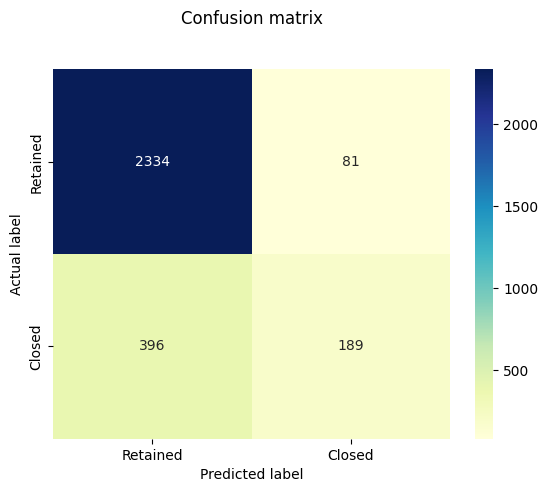

In [30]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 📊 **Classification Report Overview**  

In Artificial Intelligence, a **classification report** provides a detailed performance evaluation of a model's predictions. It includes key metrics that help assess the model's ability to classify data accurately. Below are the essential components of a classification report:

---

### **✅ True Positive Rate (Recall / Sensitivity)**  
The **True Positive Rate (TPR)** measures the proportion of actual **positive** cases that the model correctly identifies.  

🔹 **Formula:**  
\[
TPR = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
\]  
🔹 **Interpretation:**  
- A high recall means the model correctly captures most of the actual positive cases.  
- Useful in scenarios where missing a positive instance is costly (e.g., medical diagnoses).  

---

### **✅ Positive Predictive Value (Precision)**  
The **Positive Predictive Value (PPV)**, or **Precision**, evaluates how many of the predicted **positive** cases are actually correct.  

🔹 **Formula:**  
\[
PPV = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
\]  
🔹 **Interpretation:**  
- High precision means fewer false positives.  
- Important when false positives have significant consequences (e.g., spam detection).  

---

### **✅ F1 Score**  
The **F1 Score** is the **harmonic mean** of Precision and Recall, balancing both metrics.  

🔹 **Formula:**  
\[
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]  
🔹 **Interpretation:**  
- The F1 score provides a single value to assess the model’s overall classification performance.  
- Useful when there is an **imbalance** between positive and negative classes.  

---

### **🚀 Why These Metrics Matter?**  
- **Recall (TPR):** Focuses on minimizing false negatives.  
- **Precision (PPV):** Focuses on minimizing false positives.  
- **F1 Score:** Provides a balanced evaluation when both metrics are important.  

These metrics help determine how well a classifier is performing, especially in **imbalanced datasets** where accuracy alone can be misleading.  

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=target_names))

#**ROC curve**

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)